In [35]:
import numpy as np
import scanpy as sc
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from matplotlib.font_manager import FontProperties
import math
import matplotlib.ticker as ticker
from statannotations.Annotator import Annotator
from scipy import stats
from matplotlib.colors import LinearSegmentedColormap


In [36]:
adata_1hr = sc.read('../../../../Data/King/Fixed_adatas/adata_1hr.h5ad')
adata_4hr = sc.read('../../../../Data/King/Fixed_adatas/adata_4hr.h5ad')
adata_d3_1 = sc.read('../../../../Data/King/Fixed_adatas/adata_D3_1.h5ad')
adata_d3_3 = sc.read('../../../../Data/King/Fixed_adatas/adata_D3_3.h5ad')
adata_d7_2 = sc.read('../../../../Data/King/Fixed_adatas/adata_D7_2.h5ad')
adata_d7_3 = sc.read('../../../../Data/King/Fixed_adatas/adata_D7_3.h5ad')

In [37]:
pathological_score_1hr = pd.read_csv('/home/nuwaisir/Corridor/Samee_sir_lab/Workspace/PASTE_modified/to_Abid_bhaiya/Scores/scores_1hr_alpha_0.01_lambda_0.1.csv', index_col=0)
pathological_score_4hr = pd.read_csv('/home/nuwaisir/Corridor/Samee_sir_lab/Workspace/PASTE_modified/to_Abid_bhaiya/Scores/scores_4hr_alpha_0.01_lambda_0.01.csv', index_col=0)
pathological_score_d3_1 = pd.read_csv('/home/nuwaisir/Corridor/Samee_sir_lab/Workspace/PASTE_modified/to_Abid_bhaiya/Scores/scores_D3_1_alpha_0.0001_lambda_0.1.csv', index_col=0)
pathological_score_d3_3 = pd.read_csv('/home/nuwaisir/Corridor/Samee_sir_lab/Workspace/PASTE_modified/to_Abid_bhaiya/Scores/scores_D3_3_alpha_0.01_lambda_0.1.csv', index_col=0)
pathological_score_d7_2 = pd.read_csv('/home/nuwaisir/Corridor/Samee_sir_lab/Workspace/PASTE_modified/to_Abid_bhaiya/Scores/scores_D7_2_alpha_0.0001_lambda_0.1.csv', index_col=0)
pathological_score_d7_3 = pd.read_csv('/home/nuwaisir/Corridor/Samee_sir_lab/Workspace/PASTE_modified/to_Abid_bhaiya/Scores/scores_D7_3_alpha_0.01_lambda_0.01.csv', index_col=0)

In [38]:
# pathological_score_1hr = pd.DataFrame(sc.read('../../../../Workspace/SPaSE/local_data/config_King_fixed_Sham_1_vs_1hr_js_sinkhorn_lambda_0.1_alpha_0.01.json/Processed_adatas/adata_right_processed.h5ad').obs['pathological_score'])
# pathological_score_4hr = pd.DataFrame(sc.read('../../../../Workspace/SPaSE/local_data/config_King_fixed_Sham_1_vs_4hr_js_sinkhorn_lambda_0.01_alpha_0.01.json/Processed_adatas/adata_right_processed.h5ad').obs['pathological_score'])
# pathological_score_d3_1 = pd.DataFrame(sc.read('../../../../Workspace/SPaSE/local_data/config_King_fixed_Sham_1_vs_D3_1_js_sinkhorn_lambda_0.1_alpha_0.0001.json/Processed_adatas/adata_right_processed.h5ad').obs['pathological_score'])
# pathological_score_d3_3 = pd.DataFrame(sc.read('../../../../Workspace/SPaSE/local_data/config_King_fixed_Sham_1_vs_D3_3_js_sinkhorn_lambda_0.1_alpha_0.01.json/Processed_adatas/adata_right_processed.h5ad').obs['pathological_score'])
# pathological_score_d7_2 = pd.DataFrame(sc.read('../../../../Workspace/SPaSE/local_data/config_King_fixed_Sham_1_vs_D7_2_js_sinkhorn_lambda_0.1_alpha_0.0001.json/Processed_adatas/adata_right_processed.h5ad').obs['pathological_score'])
# pathological_score_d7_3 = pd.DataFrame(sc.read('../../../../Workspace/SPaSE/local_data/config_King_fixed_Sham_1_vs_D7_3_js_sinkhorn_lambda_0.01_alpha_0.01.json/Processed_adatas/adata_right_processed.h5ad').obs['pathological_score'])

In [39]:
pathological_score_1hr

remodeling_score  neg_log_pvalue
AAACAAGTATCTCCCA-1         30.042826        1.641066
AAACATTTCCCGGATT-1         27.820582        0.668511
AAACCCGAACGAAATC-1         27.317809        0.493248
AAACCGGGTAGGTACC-1         28.513425        0.940838
AAACCGTTCGTCCAGG-1         30.142551        1.690589
...                              ...             ...
TTGTGTTTCCCGAAAG-1         29.624389        1.437958
TTGTTAGCAAATTCGA-1         30.081838        1.660390
TTGTTTCACATCCAGG-1         34.718403        4.290080
TTGTTTCATTAGTCTA-1         32.982083        3.242189
TTGTTTCCATACAACT-1         29.703768        1.475886

[2351 rows x 2 columns]

In [40]:
data_folder_path = '../../../../Data/'
df_merged = pd.read_csv(f'{data_folder_path}King/Nikatag-Single-Cell-Spatial-Transcriptomics-for-Border-zone-8f7e1d1/Spatial_object_integrated@meta.data.csv', index_col=0)

df_1hr = df_merged[df_merged['orig.ident'] == '1hr']
df_4hr = df_merged[df_merged['orig.ident'] == '4hr']

df_D3_1 = df_merged[df_merged['orig.ident'] == 'D3_1']
df_D3_3 = df_merged[df_merged['orig.ident'] == 'D3_3']

df_D7_2 = df_merged[df_merged['orig.ident'] == 'D7_2']
df_D7_3 = df_merged[df_merged['orig.ident'] == 'D7_3']

df_1hr.index = np.array(list(map(lambda x: x.split('_')[0], df_1hr.index)))
df_4hr.index = np.array(list(map(lambda x: x.split('_')[0], df_4hr.index)))
df_D3_1.index = np.array(list(map(lambda x: x.split('_')[0], df_D3_1.index)))
df_D3_3.index = np.array(list(map(lambda x: x.split('_')[0], df_D3_3.index)))
df_D7_2.index = np.array(list(map(lambda x: x.split('_')[0], df_D7_2.index)))
df_D7_3.index = np.array(list(map(lambda x: x.split('_')[0], df_D7_3.index)))

adata_1hr_filtered = adata_1hr[adata_1hr.obs.index.isin(df_1hr.index)]
adata_4hr_filtered = adata_4hr[adata_4hr.obs.index.isin(df_4hr.index)]
adata_d3_1_filtered = adata_d3_1[adata_d3_1.obs.index.isin(df_D3_1.index)]
adata_d3_3_filtered = adata_d3_3[adata_d3_3.obs.index.isin(df_D3_3.index)]
adata_d7_2_filtered = adata_d7_2[adata_d7_2.obs.index.isin(df_D7_2.index)]
adata_d7_3_filtered = adata_d7_3[adata_d7_3.obs.index.isin(df_D7_3.index)]

adata_1hr_filtered.obs = adata_1hr_filtered.obs.join(df_1hr[['final_clusters']])
adata_4hr_filtered.obs = adata_4hr_filtered.obs.join(df_4hr[['final_clusters']])
adata_d3_1_filtered.obs = adata_d3_1_filtered.obs.join(df_D3_1[['final_clusters']])
adata_d3_3_filtered.obs = adata_d3_3_filtered.obs.join(df_D3_3[['final_clusters']])
adata_d7_2_filtered.obs = adata_d7_2_filtered.obs.join(df_D7_2[['final_clusters']])
adata_d7_3_filtered.obs = adata_d7_3_filtered.obs.join(df_D7_3[['final_clusters']])

adata_1hr_filtered.obs['pathological_score'] = pathological_score_1hr['remodeling_score']
adata_4hr_filtered.obs['pathological_score'] = pathological_score_4hr['remodeling_score']
adata_d3_1_filtered.obs['pathological_score'] = pathological_score_d3_1['remodeling_score']
adata_d3_3_filtered.obs['pathological_score'] = pathological_score_d3_3['remodeling_score']
adata_d7_2_filtered.obs['pathological_score'] = pathological_score_d7_2['remodeling_score']
adata_d7_3_filtered.obs['pathological_score'] = pathological_score_d7_3['remodeling_score']

# adata_1hr_filtered.obs = adata_1hr_filtered.obs.join(pathological_score_1hr[['pathological_score']])
# adata_4hr_filtered.obs = adata_4hr_filtered.obs.join(pathological_score_4hr[['pathological_score']])
# adata_d3_1_filtered.obs = adata_d3_1_filtered.obs.join(pathological_score_d3_1[['pathological_score']])
# adata_d3_3_filtered.obs = adata_d3_3_filtered.obs.join(pathological_score_d3_3[['pathological_score']])
# adata_d7_2_filtered.obs = adata_d7_2_filtered.obs.join(pathological_score_d7_2[['pathological_score']])
# adata_d7_3_filtered.obs = adata_d7_3_filtered.obs.join(pathological_score_d7_3[['pathological_score']])

In [41]:
df_1hr = adata_1hr_filtered.obs
df_1hr['sample'] = '1hr'

df_4hr = adata_4hr_filtered.obs
df_4hr['sample'] = '4hr'

df_d3_1 = adata_d3_1_filtered.obs
df_d3_1['sample'] = 'D3_1'

df_d3_3 = adata_d3_3_filtered.obs
df_d3_3['sample'] = 'D3_3'

df_d7_2 = adata_d7_2_filtered.obs
df_d7_2['sample'] = 'D7_2'

df_d7_3 = adata_d7_3_filtered.obs
df_d7_3['sample'] = 'D7_3'

In [42]:
df_concat = pd.concat([df_1hr, df_4hr, df_d3_1, df_d3_3, df_d7_2, df_d7_3], axis=0)
df_concat

in_tissue  array_row  array_col  final_clusters  \
AAACAAGTATCTCCCA-1          1         50        102               1   
AAACATTTCCCGGATT-1          1         61         97               1   
AAACCCGAACGAAATC-1          1         45        115               1   
AAACCGGGTAGGTACC-1          1         42         28               1   
AAACCGTTCGTCCAGG-1          1         52         42               1   
...                       ...        ...        ...             ...   
TTGTTCTAGATACGCT-1          1         21          3               1   
TTGTTTCACATCCAGG-1          1         58         42               1   
TTGTTTCATTAGTCTA-1          1         60         30               1   
TTGTTTCCATACAACT-1          1         45         27               1   
TTGTTTGTGTAAATTC-1          1          7         51               2   

                    pathological_score sample  
AAACAAGTATCTCCCA-1           30.042826    1hr  
AAACATTTCCCGGATT-1           27.820582    1hr  
AAACCCGAACGAAATC-1           27.317809    1hr  
AAACCGGGTAGGTACC-1           28.513425    1hr  
AAACCGTTCGTCCAGG-1           30.142551    1hr  
...                                ...    ...  
TTGTTCTAGATACGCT-1           25.491218   D7_3  
TTGTTTCACATCCAGG-1           26.988359   D7_3  
TTGTTTCATTAGTCTA-1           29.393000   D7_3  
TTGTTTCCATACAACT-1           27.514756   D7_3  
TTGTTTGTGTAAATTC-1           38.462146   D7_3  

[13886 rows x 6 columns]

# Boxplot of pathological scores

In [43]:
final_clusters_to_zone = {
    1: 'RZ',
    2: 'BZ1',
    3: 'BZ2',
    4: 'IZ'
} # this dictionary is set these values by checking the D3 and D7 samples

df_concat['final_clusters'] = df_concat['final_clusters'].replace(final_clusters_to_zone)
df_concat

in_tissue  array_row  array_col final_clusters  \
AAACAAGTATCTCCCA-1          1         50        102             RZ   
AAACATTTCCCGGATT-1          1         61         97             RZ   
AAACCCGAACGAAATC-1          1         45        115             RZ   
AAACCGGGTAGGTACC-1          1         42         28             RZ   
AAACCGTTCGTCCAGG-1          1         52         42             RZ   
...                       ...        ...        ...            ...   
TTGTTCTAGATACGCT-1          1         21          3             RZ   
TTGTTTCACATCCAGG-1          1         58         42             RZ   
TTGTTTCATTAGTCTA-1          1         60         30             RZ   
TTGTTTCCATACAACT-1          1         45         27             RZ   
TTGTTTGTGTAAATTC-1          1          7         51            BZ1   

                    pathological_score sample  
AAACAAGTATCTCCCA-1           30.042826    1hr  
AAACATTTCCCGGATT-1           27.820582    1hr  
AAACCCGAACGAAATC-1           27.317809    1hr  
AAACCGGGTAGGTACC-1           28.513425    1hr  
AAACCGTTCGTCCAGG-1           30.142551    1hr  
...                                ...    ...  
TTGTTCTAGATACGCT-1           25.491218   D7_3  
TTGTTTCACATCCAGG-1           26.988359   D7_3  
TTGTTTCATTAGTCTA-1           29.393000   D7_3  
TTGTTTCCATACAACT-1           27.514756   D7_3  
TTGTTTGTGTAAATTC-1           38.462146   D7_3  

[13886 rows x 6 columns]

In [44]:
df_concat['sample'].unique()

array(['1hr', '4hr', 'D3_1', 'D3_3', 'D7_2', 'D7_3'], dtype=object)

In [45]:
df_concat['final_clusters'] = np.where((((df_concat['sample'] == '1hr') & (df_concat['final_clusters'] == 'IZ')) | ((df_concat['sample'] == '4hr') & (df_concat['final_clusters'] == 'IZ'))), 'BZ2', df_concat['final_clusters'])

In [46]:
# plt.figure(figsize = (10, 6))
hue_order = ['RZ', 'BZ1', 'BZ2', 'IZ']
# sns.boxplot(data=df_concat, x='sample', y='pathological_score', hue='final_clusters', hue_order=hue_order, ax=ax_box_plots)
# sns.move_legend(ax_box_plots, "upper left")
# sns.move_legend(ax_box_plots, "upper left", bbox_to_anchor=(1, 1))

In [47]:
adata_1hr_filtered.obs['final_clusters'].replace(4, 3, inplace=True)
adata_4hr_filtered.obs['final_clusters'].replace(4, 3, inplace=True)

In [48]:
mpl.rcParams['font.size'] = 8
mpl.rcParams['font.size']

8.0

In [49]:
df_concat['Sample'] = df_concat['sample']
df_concat['Pathological score'] = df_concat['pathological_score']
df_concat['Final clusters'] = df_concat['final_clusters']

df_concat['Sample'].replace({'D3_1': '72 hour (rep1)', 'D3_3': '72 hour (rep3)', 'D7_2': '168 hour (rep2)', 'D7_3': '168 hour (rep3)'}, inplace=True)

In [50]:
df_concat_1_4 = df_concat[(df_concat['Sample'] == '1hr') | (df_concat['Sample'] == '4hr')]
df_concat = df_concat[(df_concat['Sample'] != '1hr') & (df_concat['Sample'] != '4hr')]

In [51]:
# plt.figure(figsize=(8, 3))
# hue_order = ['RZ', 'BZ1', 'BZ2', 'IZ']
hue_order_1_4 = ['RZ', 'BZ1', 'BZ2']
# ax = sns.boxplot(data=df_concat, x='Sample', y='Pathological score', hue='Final clusters', hue_order=hue_order)
# plt.savefig('/home/nuwaisir/Corridor/Samee_sir_lab/Workspace/PASTE_modified/Figures/Results_figures/pathological_score_in_zones.eps', format='eps', bbox_inches='tight')

In [52]:
sample_shortname_map = {
    '168 hour (rep3)': '7d(rep3)',
    '168 hour (rep2)': '7d(rep2)',
    '72 hour (rep1)': '3d(rep1)',
    '72 hour (rep3)': '3d(rep3)',
}
df_concat['Sample'] = df_concat['Sample'].replace(sample_shortname_map)

/tmp/ipykernel_14046/1865148590.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concat['Sample'] = df_concat['Sample'].replace(sample_shortname_map)


In [53]:
sample_to_adata_filtered_map = {
    '1hr': adata_1hr_filtered,
    '4hr': adata_4hr_filtered,
    'D3_1': adata_d3_1_filtered,
    'D3_3': adata_d3_3_filtered,
    'D7_2': adata_d7_2_filtered,
    'D7_3': adata_d7_3_filtered,
}

zones = adata_d3_1_filtered.obs['final_clusters'].unique()
zone_to_region_name = {
    1: 'RZ',
    2: 'BZ1',
    3: 'BZ2',
    4: 'IZ',
}

p_value_matrix = np.zeros((len(zones), len(zones)))

samples = ['D3_1', 'D3_3', 'D7_2', 'D7_3']

for sample in samples:
    r = 0
    for i in zones:
        c = 0
        for j in zones:
            df = sample_to_adata_filtered_map[sample].obs
            df_zone_1 = df[df['final_clusters'] == i]
            df_zone_2 = df[df['final_clusters'] == j]
            t_statistic, p_value = stats.ttest_ind(df_zone_1['pathological_score'], df_zone_2['pathological_score'])
            p_value_matrix[r][c] = p_value
            c += 1
        r += 1

zone_names = list(map(lambda x: zone_to_region_name[x], zones))
p_value_matrix_formated = pd.DataFrame(p_value_matrix, columns=zone_names, index=zone_names)

pvalues = [
    p_value_matrix_formated['RZ'].loc['BZ1'],
    p_value_matrix_formated['BZ1'].loc['BZ2'],
    p_value_matrix_formated['BZ2'].loc['IZ']
]

formatted_pvalues = [f'p={pvalue:.2e}' for pvalue in pvalues]

In [54]:
df_concat_1_4['Final clusters'].unique()

array(['RZ', 'BZ1', 'BZ2'], dtype=object)

In [55]:
pairs = [
    [('1hr', 'RZ'), ('1hr', 'BZ1')],
    [('1hr', 'BZ1'), ('1hr', 'BZ2')],
    [('4hr', 'RZ'), ('4hr', 'BZ1')],
    [('4hr', 'BZ1'), ('4hr', 'BZ2')],
]

In [56]:
df_concat_1_4

in_tissue  array_row  array_col final_clusters  \
AAACAAGTATCTCCCA-1          1         50        102             RZ   
AAACATTTCCCGGATT-1          1         61         97             RZ   
AAACCCGAACGAAATC-1          1         45        115             RZ   
AAACCGGGTAGGTACC-1          1         42         28             RZ   
AAACCGTTCGTCCAGG-1          1         52         42             RZ   
...                       ...        ...        ...            ...   
TTGTGTTTCCCGAAAG-1          1         51         59             RZ   
TTGTTAGCAAATTCGA-1          1         22         42             RZ   
TTGTTTCATTAGTCTA-1          1         60         30             RZ   
TTGTTTCCATACAACT-1          1         45         27             RZ   
TTGTTTGTGTAAATTC-1          1          7         51             RZ   

                    pathological_score sample Sample  Pathological score  \
AAACAAGTATCTCCCA-1           30.042826    1hr    1hr           30.042826   
AAACATTTCCCGGATT-1           27.820582    1hr    1hr           27.820582   
AAACCCGAACGAAATC-1           27.317809    1hr    1hr           27.317809   
AAACCGGGTAGGTACC-1           28.513425    1hr    1hr           28.513425   
AAACCGTTCGTCCAGG-1           30.142551    1hr    1hr           30.142551   
...                                ...    ...    ...                 ...   
TTGTGTTTCCCGAAAG-1           30.778874    4hr    4hr           30.778874   
TTGTTAGCAAATTCGA-1           28.992827    4hr    4hr           28.992827   
TTGTTTCATTAGTCTA-1           29.560236    4hr    4hr           29.560236   
TTGTTTCCATACAACT-1           29.703624    4hr    4hr           29.703624   
TTGTTTGTGTAAATTC-1           32.396479    4hr    4hr           32.396479   

                   Final clusters  
AAACAAGTATCTCCCA-1             RZ  
AAACATTTCCCGGATT-1             RZ  
AAACCCGAACGAAATC-1             RZ  
AAACCGGGTAGGTACC-1             RZ  
AAACCGTTCGTCCAGG-1             RZ  
...                           ...  
TTGTGTTTCCCGAAAG-1             RZ  
TTGTTAGCAAATTCGA-1             RZ  
TTGTTTCATTAGTCTA-1             RZ  
TTGTTTCCATACAACT-1             RZ  
TTGTTTGTGTAAATTC-1             RZ  

[4805 rows x 9 columns]

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

4hr_BZ1 vs. 4hr_BZ2: t-test independent samples, P_val:7.509e-01 t=-3.177e-01
1hr_RZ vs. 1hr_BZ1: t-test independent samples, P_val:8.556e-30 t=-1.150e+01
1hr_BZ1 vs. 1hr_BZ2: t-test independent samples, P_val:1.362e-02 t=-2.475e+00
4hr_RZ vs. 4hr_BZ1: t-test independent samples, P_val:3.510e-24 t=-1.025e+01


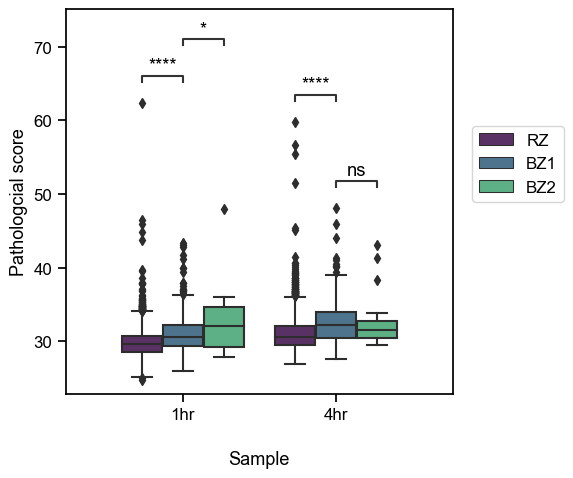

In [57]:
font_size = 13

# Set the font family and size for the entire plot
plt.rcParams['font.family'] = 'Arial'  # Change 'Arial' to your desired font family
plt.rcParams['font.size'] = font_size  # Change 11 to your desired font size

custom_palette = {
    'RZ': (96/256, 40/256, 110/256),
    'BZ1': (68/256, 118/256, 152/256),
    'BZ2': (79/256, 191/256, 133/256),
    # 'IZ': (253/256, 235/256, 85/256)
}

hue_plot_params = {
    'data': df_concat_1_4,
    'x': 'Sample',
    'y': 'Pathological score',
    "hue": "Final clusters",
    "hue_order": hue_order_1_4,
    "palette": custom_palette
}

def get_ax(orient="v"):
    if orient == "v":
        figsize = (5, 5)
        set_scale = "set_yscale"
    else:
        figsize = (5, 5)
        set_scale = "set_xscale"
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    fig.patch.set_alpha(1)
    # getattr(ax, set_scale)("log")
    return ax

def add_legend(ax):
    ax.legend(loc=(1.05, 0.5))

def label_plot_for_subcats(ax):
    # plt.title("Pathological scores of the spots in each cardiac zone annotated by Calcagno et al.", y=1.06)
    ax.set_ylabel("Pathologcial score", fontfamily='Arial', fontsize=font_size)
    ax.set_xlabel("Sample", labelpad=20, fontfamily='Arial', fontsize=font_size)
    # ax.ticklabel_format(style='plain')
    

with sns.plotting_context("notebook", font_scale = 1.1):
    # Create new plot
    ax = get_ax()

    # Plot with seaborn
    ax = sns.boxplot(ax=ax, **hue_plot_params)

    # Add annotations
    annotator = Annotator(ax, pairs, **hue_plot_params)
    annotator.configure(test="t-test_ind").apply_and_annotate()

    # Label and show
    add_legend(ax)
    label_plot_for_subcats(ax)

In [58]:
pairs = [
    [('7d(rep3)', 'RZ'), ('7d(rep3)', 'BZ1')],
    [('7d(rep3)', 'BZ1'), ('7d(rep3)', 'BZ2')],
    [('7d(rep3)', 'BZ2'), ('7d(rep3)', 'IZ')]
]


In [60]:
sample = pairs[0][0][0]
df_concat_3d_rep1 = df_concat[df_concat['Sample'] == sample]
df_concat_3d_rep1

in_tissue  array_row  array_col final_clusters  \
AAACAAGTATCTCCCA-1          1         50        102            BZ2   
AAACAATCTACTAGCA-1          1          3         43            BZ1   
AAACAGAGCGACTCCT-1          1         14         94             IZ   
AAACAGCTTTCAGAAG-1          1         43          9             RZ   
AAACAGGGTCTATATT-1          1         47         13             RZ   
...                       ...        ...        ...            ...   
TTGTTCTAGATACGCT-1          1         21          3             RZ   
TTGTTTCACATCCAGG-1          1         58         42             RZ   
TTGTTTCATTAGTCTA-1          1         60         30             RZ   
TTGTTTCCATACAACT-1          1         45         27             RZ   
TTGTTTGTGTAAATTC-1          1          7         51            BZ1   

                    pathological_score sample    Sample  Pathological score  \
AAACAAGTATCTCCCA-1           58.052728   D7_3  7d(rep3)           58.052728   
AAACAATCTACTAGCA-1           35.369528   D7_3  7d(rep3)           35.369528   
AAACAGAGCGACTCCT-1           64.242723   D7_3  7d(rep3)           64.242723   
AAACAGCTTTCAGAAG-1           27.238145   D7_3  7d(rep3)           27.238145   
AAACAGGGTCTATATT-1           26.258602   D7_3  7d(rep3)           26.258602   
...                                ...    ...       ...                 ...   
TTGTTCTAGATACGCT-1           25.491218   D7_3  7d(rep3)           25.491218   
TTGTTTCACATCCAGG-1           26.988359   D7_3  7d(rep3)           26.988359   
TTGTTTCATTAGTCTA-1           29.393000   D7_3  7d(rep3)           29.393000   
TTGTTTCCATACAACT-1           27.514756   D7_3  7d(rep3)           27.514756   
TTGTTTGTGTAAATTC-1           38.462146   D7_3  7d(rep3)           38.462146   

                   Final clusters  
AAACAAGTATCTCCCA-1            BZ2  
AAACAATCTACTAGCA-1            BZ1  
AAACAGAGCGACTCCT-1             IZ  
AAACAGCTTTCAGAAG-1             RZ  
AAACAGGGTCTATATT-1             RZ  
...                           ...  
TTGTTCTAGATACGCT-1             RZ  
TTGTTTCACATCCAGG-1             RZ  
TTGTTTCATTAGTCTA-1             RZ  
TTGTTTCCATACAACT-1             RZ  
TTGTTTGTGTAAATTC-1            BZ1  

[2277 rows x 9 columns]

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

7d(rep3)_BZ2 vs. 7d(rep3)_IZ: t-test independent samples, P_val:8.932e-167 t=-3.378e+01


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


7d(rep3)_RZ vs. 7d(rep3)_BZ1: t-test independent samples, P_val:6.127e-263 t=-4.453e+01
7d(rep3)_BZ1 vs. 7d(rep3)_BZ2: t-test independent samples, P_val:2.358e-216 t=-4.154e+01


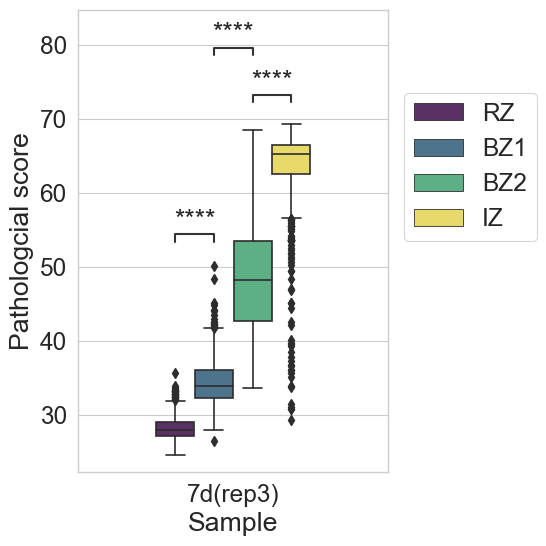

In [23]:
sns.set(style="whitegrid")
# Set the font family and size for the entire plot

custom_palette = {
    'RZ': (96/256, 40/256, 110/256),
    'BZ1': (68/256, 118/256, 152/256),
    'BZ2': (79/256, 191/256, 133/256),
    'IZ': (253/256, 235/256, 85/256)
}

hue_plot_params = {
    'data': df_concat_3d_rep1,
    'x': 'Sample',
    'y': 'Pathological score',
    "hue": "Final clusters",
    "hue_order": hue_order,
    "palette": custom_palette,
}

def get_ax(orient="v"):
    if orient == "v":
        figsize = (4, 6)
        set_scale = "set_yscale"
    else:
        figsize = (6, 4)
        set_scale = "set_xscale"
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    # getattr(ax, set_scale)("log")
    return ax

def add_legend(ax):
    ax.legend(loc=(1.05, 0.5))

def label_plot_for_subcats(ax):
    ax.set_ylabel("Pathologcial score")
    ax.set_xlabel("Sample")
    

with sns.plotting_context("paper", font_scale = 2):
    # Create new plot
    ax = get_ax()

    # Plot with seaborn
    ax = sns.boxplot(ax=ax, **hue_plot_params)

    # Add annotations
    annotator = Annotator(ax, pairs, **hue_plot_params)
    annotator.configure(test="t-test_ind", text_format='star').apply_and_annotate()

    # Label and show
    add_legend(ax)
    label_plot_for_subcats(ax)
    # sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
    # plt.show()
    plt.savefig(f'/home/nuwaisir/Corridor/Samee_sir_lab/Workspace/PASTE_modified/Figures/Results_figures/pathological_score_in_zones_{sample}.eps', format='eps', bbox_inches='tight')
    plt.savefig(f'/home/nuwaisir/Corridor/Samee_sir_lab/Workspace/PASTE_modified/Figures/Results_figures/pathological_score_in_zones_{sample}.png', format='png', bbox_inches='tight', dpi=600)

In [24]:
# sns.plotting_context("paper")

In [25]:
pairs = [
    [('3d(rep1)', 'RZ'), ('3d(rep1)', 'BZ1')],
    [('3d(rep1)', 'BZ1'), ('3d(rep1)', 'BZ2')],
    [('3d(rep1)', 'BZ2'), ('3d(rep1)', 'IZ')],

    [('3d(rep3)', 'RZ'), ('3d(rep3)', 'BZ1')],
    [('3d(rep3)', 'BZ1'), ('3d(rep3)', 'BZ2')],
    [('3d(rep3)', 'BZ2'), ('3d(rep3)', 'IZ')],

    [('7d(rep2)', 'RZ'), ('7d(rep2)', 'BZ1')],
    [('7d(rep2)', 'BZ1'), ('7d(rep2)', 'BZ2')],
    [('7d(rep2)', 'BZ2'), ('7d(rep2)', 'IZ')],

    [('7d(rep3)', 'RZ'), ('7d(rep3)', 'BZ1')],
    [('7d(rep3)', 'BZ1'), ('7d(rep3)', 'BZ2')],
    [('7d(rep3)', 'BZ2'), ('7d(rep3)', 'IZ')]
]

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

7d(rep2)_BZ2 vs. 7d(rep2)_IZ: t-test independent samples, P_val:4.739e-169 t=-3.406e+01
7d(rep3)_RZ vs. 7d(rep3)_BZ1: t-test independent samples, P_val:6.127e-263 t=-4.453e+01
7d(rep3)_BZ2 vs. 7d(rep3)_IZ: t-test independent samples, P_val:8.932e-167 t=-3.378e+01
3d(rep3)_BZ2 vs. 3d(rep3)_IZ: t-test independent samples, P_val:8.279e-49 t=-1.548e+01
7d(rep2)_RZ vs. 7d(rep2)_BZ1: t-test independent samples, P_val:5.991e-35 t=-1.270e+01
3d(rep1)_BZ2 vs. 3d(rep1)_IZ: t-test independent samples, P_val:2.221e-127 t=-2.735e+01
3d(rep1)_RZ vs. 3d(rep1)_BZ1: t-test independent samples, P_val:7.224e-139 t=-2.964e+01
3d(rep1)_BZ1 vs. 3d(rep1)_BZ2: t-test independent samples, P_val:3.213e-142 t=-3.244e+01
3d(rep3)_RZ vs. 3d(rep3)_BZ1: t-test independent samples, P_val:1.246e-134 t=-2.792e+01
3d(rep3)_BZ1 vs. 

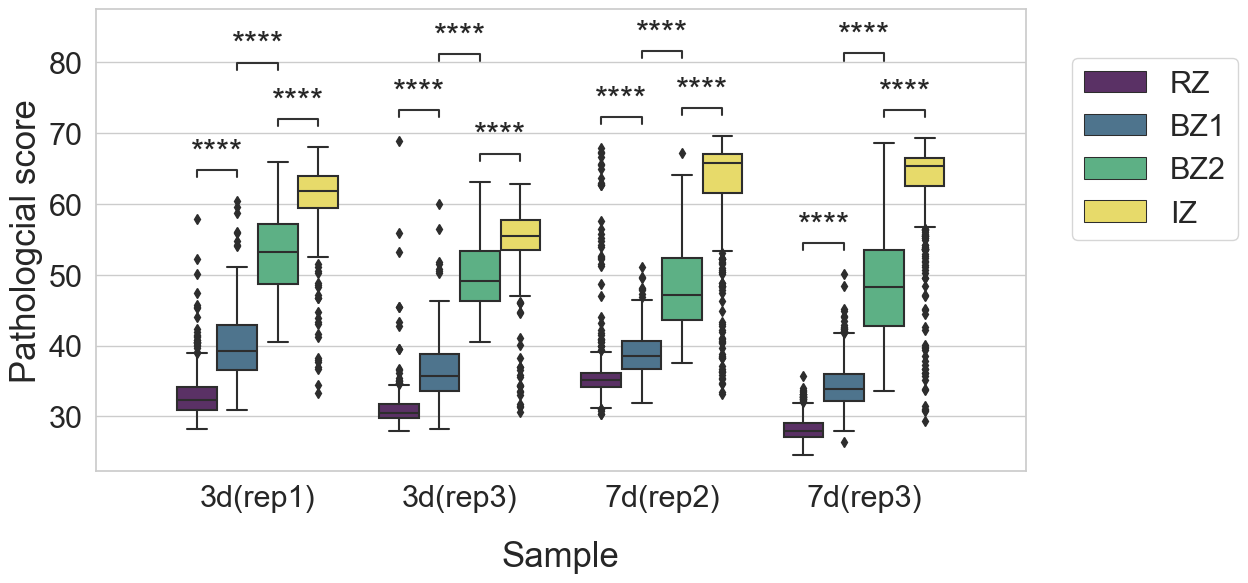

In [26]:
font_size = 25

# Set the font family and size for the entire plot
plt.rcParams['font.family'] = 'Arial'  # Change 'Arial' to your desired font family
plt.rcParams['font.size'] = font_size  # Change 11 to your desired font size

custom_palette = {
    'RZ': (96/256, 40/256, 110/256),
    'BZ1': (68/256, 118/256, 152/256),
    'BZ2': (79/256, 191/256, 133/256),
    'IZ': (253/256, 235/256, 85/256)
}

hue_plot_params = {
    'data': df_concat,
    'x': 'Sample',
    'y': 'Pathological score',
    "hue": "Final clusters",
    "hue_order": hue_order,
    "palette": custom_palette
}

def get_ax(orient="v"):
    if orient == "v":
        figsize = (12, 6)
        set_scale = "set_yscale"
    else:
        figsize = (10, 8)
        set_scale = "set_xscale"
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    fig.patch.set_alpha(1)
    # getattr(ax, set_scale)("log")
    return ax

def add_legend(ax):
    ax.legend(loc=(1.05, 0.5))

def label_plot_for_subcats(ax):
    ax.set_ylabel("Pathologcial score", fontfamily='Arial', fontsize=font_size)
    ax.set_xlabel("Sample", labelpad=20, fontfamily='Arial', fontsize=font_size)
    
with sns.plotting_context("notebook", font_scale = 2):
    # Create new plot
    ax = get_ax()

    # Plot with seaborn
    ax = sns.boxplot(ax=ax, **hue_plot_params)

    # Add annotations
    annotator = Annotator(ax, pairs, **hue_plot_params)
    annotator.configure(test="t-test_ind").apply_and_annotate()

    # Label and show
    add_legend(ax)
    label_plot_for_subcats(ax)

# Calcagno et al.'s annotations

In [27]:
adata_1hr_x, adata_1hr_y = adata_1hr_filtered.obsm['spatial'][:, 1], -adata_1hr_filtered.obsm['spatial'][:, 0]
adata_4hr_x, adata_4hr_y = -adata_4hr_filtered.obsm['spatial'][:, 0], -adata_4hr_filtered.obsm['spatial'][:, 1]
adata_d3_1_x, adata_d3_1_y = adata_d3_1_filtered.obsm['spatial'][:, 1], adata_d3_1_filtered.obsm['spatial'][:, 0]
adata_d3_3_x, adata_d3_3_y = -adata_d3_3_filtered.obsm['spatial'][:, 0], adata_d3_3_filtered.obsm['spatial'][:, 1]
adata_d7_2_x, adata_d7_2_y = -adata_d7_2_filtered.obsm['spatial'][:, 1], -adata_d7_2_filtered.obsm['spatial'][:, 0]
adata_d7_3_x, adata_d7_3_y = adata_d7_3_filtered.obsm['spatial'][:, 1], adata_d7_3_filtered.obsm['spatial'][:, 0]

In [28]:
import matplotlib.colors as colors

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

In [29]:
def sub_cmap(cmap, vmin, vmax):
    return lambda v: cmap(vmin + (vmax - vmin) * v)

/tmp/ipykernel_20854/1512867884.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax12.scatter(adata_d3_1_x, adata_d3_1_y, c=[value_color_mapping[value] for value in adata_d3_1_filtered.obs['final_clusters']], s=0.5, cmap=cmap)
/tmp/ipykernel_20854/1512867884.py:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax13.scatter(adata_d3_3_x, adata_d3_3_y, c=[value_color_mapping[value] for value in adata_d3_3_filtered.obs['final_clusters']], s=0.5, cmap=cmap)
/tmp/ipykernel_20854/1512867884.py:32: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax14.scatter(adata_d7_2_x, adata_d7_2_y, c=[value_color_mapping[value] for value in adata_d7_2_filtered.obs['final_clusters']], s=0.5, cmap=cmap)
/tmp/ipykernel_20854/1512867884.py:35: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax15.scatter(adata_d7_3_x, adata_d7_3_

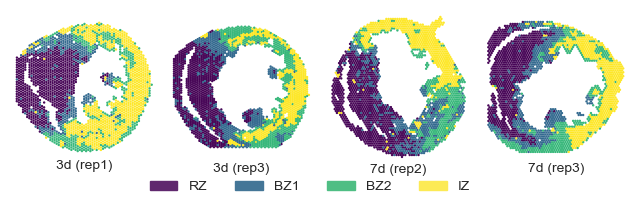

In [30]:
fig = plt.figure(figsize=(8, 2))

gs = fig.add_gridspec(1,12)

font = FontProperties(family='Arial', size=10)

ax12 = fig.add_subplot(gs[0, 0:3])
ax13 = fig.add_subplot(gs[0, 3:6])
ax14 = fig.add_subplot(gs[0, 6:9])
ax15 = fig.add_subplot(gs[0, 9:])

ax12.axis('off')
ax13.axis('off')
ax14.axis('off')
ax15.axis('off')
ax12.set_aspect('equal')
ax13.set_aspect('equal')
ax14.set_aspect('equal')
ax15.set_aspect('equal')

cluster_values = sorted(list(adata_d3_1_filtered.obs['final_clusters'].unique()))
custom_cmap = plt.cm.get_cmap('viridis', len(cluster_values))
value_color_mapping = {value: custom_cmap(i) for i, value in enumerate(cluster_values)}
cmap = custom_cmap

ax12.scatter(adata_d3_1_x, adata_d3_1_y, c=[value_color_mapping[value] for value in adata_d3_1_filtered.obs['final_clusters']], s=0.5, cmap=cmap)
ax12.text((adata_d3_1_x.max() + adata_d3_1_x.min()) / 2, np.min(adata_d3_1_y)-2000, '3d (rep1)', ha='center', fontproperties=font)

ax13.scatter(adata_d3_3_x, adata_d3_3_y, c=[value_color_mapping[value] for value in adata_d3_3_filtered.obs['final_clusters']], s=0.5, cmap=cmap)
ax13.text((adata_d3_3_x.max() + adata_d3_3_x.min()) / 2, np.min(adata_d3_3_y)-3250, '3d (rep3)', ha='center', fontproperties=font)

ax14.scatter(adata_d7_2_x, adata_d7_2_y, c=[value_color_mapping[value] for value in adata_d7_2_filtered.obs['final_clusters']], s=0.5, cmap=cmap)
ax14.text((adata_d7_2_x.max() + adata_d7_2_x.min()) / 2, np.min(adata_d7_2_y)-2000, '7d (rep2)', ha='center', fontproperties=font)

ax15.scatter(adata_d7_3_x, adata_d7_3_y, c=[value_color_mapping[value] for value in adata_d7_3_filtered.obs['final_clusters']], s=0.5, cmap=cmap)
ax15.text((adata_d7_3_x.max() + adata_d7_3_x.min()) / 2, np.min(adata_d7_3_y)-2500, '7d (rep3)', ha='center', fontproperties=font)

cluster_colors = [(96/256, 40/256, 110/256), (68/256, 118/256, 152/256), (79/256, 191/256, 133/256), (253/256, 235/256, 85/256)]
legend_labels = ['RZ', 'BZ1', 'BZ2', 'IZ']

legend_handles = [mpatches.Patch(color=color, label=label) for color, label in zip(cluster_colors, legend_labels)]

# Create the legend
legend = fig.legend(handles=legend_handles, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=4, frameon=False, prop=font)


# Scatter plots of pathological scores

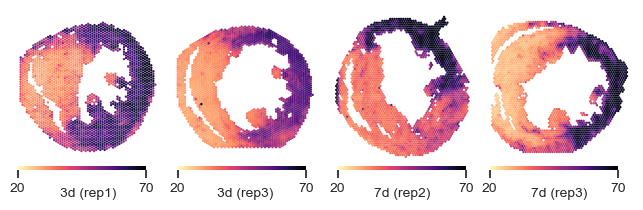

In [31]:
import matplotlib.cm as cm

fig = plt.figure(figsize=(8, 2))

gs = fig.add_gridspec(1, 12)

ax22 = fig.add_subplot(gs[0, 0:3])
ax23 = fig.add_subplot(gs[0, 3:6])
ax24 = fig.add_subplot(gs[0, 6:9])
ax25 = fig.add_subplot(gs[0, 9:])
ax22.set_aspect('equal')
ax23.set_aspect('equal')
ax24.set_aspect('equal')
ax25.set_aspect('equal')

ax22.axis('off')
ax23.axis('off')
ax24.axis('off')
ax25.axis('off')

original_cmap = cm.get_cmap('magma')
reversed_cmap = original_cmap.reversed()

sc3 = ax22.scatter(adata_d3_1_x, adata_d3_1_y, c=adata_d3_1_filtered.obs['pathological_score'], s=0.5, vmin=20, vmax=70, cmap=reversed_cmap)
ax22.text((adata_d3_1_x.max() + adata_d3_1_x.min()) / 2, np.min(adata_d3_1_y)-5200, '3d (rep1)', ha='center', fontproperties=font)

sc4 = ax23.scatter(adata_d3_3_x, adata_d3_3_y, c=adata_d3_3_filtered.obs['pathological_score'], s=0.5, vmin=20, vmax=70, cmap=reversed_cmap)
ax23.text((adata_d3_3_x.max() + adata_d3_3_x.min()) / 2, np.min(adata_d3_3_y)-6500, '3d (rep3)', ha='center', fontproperties=font)

sc5 = ax24.scatter(adata_d7_2_x, adata_d7_2_y, c=adata_d7_2_filtered.obs['pathological_score'], s=0.5, vmin=20, vmax=70, cmap=reversed_cmap)
ax24.text((adata_d7_2_x.max() + adata_d7_2_x.min()) / 2, np.min(adata_d7_2_y)-5000, '7d (rep2)', ha='center', fontproperties=font)

sc6 = ax25.scatter(adata_d7_3_x, adata_d7_3_y, c=adata_d7_3_filtered.obs['pathological_score'], s=0.5, vmin=20, vmax=70, cmap=reversed_cmap)
ax25.text((adata_d7_3_x.max() + adata_d7_3_x.min()) / 2, np.min(adata_d7_3_y)-5500, '7d (rep3)', ha='center', fontproperties=font)

cbar_ax22 = fig.add_axes([0.13, 0.08, 0.16, 0.02])
cbar_ax23 = fig.add_axes([0.33, 0.08, 0.16, 0.02])
cbar_ax24 = fig.add_axes([0.53, 0.08, 0.16, 0.02])
cbar_ax25 = fig.add_axes([0.72, 0.08, 0.16, 0.02])

cbar42 = plt.colorbar(sc3, cax=cbar_ax22, orientation='horizontal')
tick_positions = [cbar42.vmin, cbar42.vmax]
cbar42.set_ticks(tick_positions)
cbar42.outline.set_visible(False)
cbar42.ax.tick_params(labelsize=10)

cbar43 = plt.colorbar(sc4, cax=cbar_ax23, orientation='horizontal')
tick_positions = [cbar43.vmin, cbar43.vmax]
cbar43.set_ticks(tick_positions)
cbar43.outline.set_visible(False)
cbar43.ax.tick_params(labelsize=10)

cbar44 = plt.colorbar(sc5, cax=cbar_ax24, orientation='horizontal')
tick_positions = [cbar44.vmin, cbar44.vmax]
cbar44.set_ticks(tick_positions)
cbar44.outline.set_visible(False)
cbar44.ax.tick_params(labelsize=10)

cbar45 = plt.colorbar(sc6, cax=cbar_ax25, orientation='horizontal')
tick_positions = [cbar45.vmin, cbar45.vmax]
cbar45.set_ticks(tick_positions)
cbar45.outline.set_visible(False)
cbar45.ax.tick_params(labelsize=10)

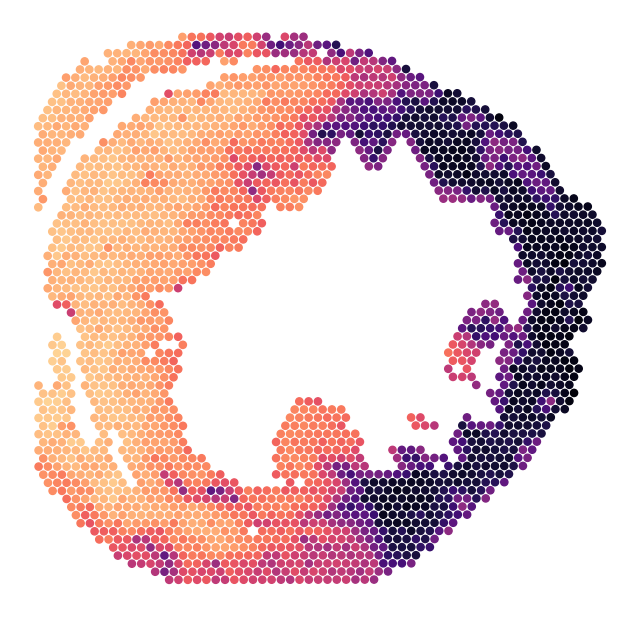

In [32]:
plt.figure(figsize = (8, 8))
plt.gca().set_aspect('equal')
plt.axis('off')
plt.scatter(adata_d7_3_x, adata_d7_3_y, c=adata_d7_3_filtered.obs['pathological_score'], vmin=20, vmax=70, cmap='magma_r', s=27)

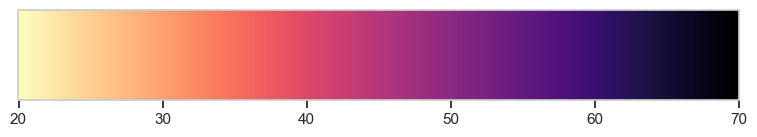

In [33]:
a = np.array([[20,70]])
plt.figure(figsize=(9, 1.5))
img = plt.imshow(a, cmap="magma_r")
plt.gca().set_visible(False)
cax = plt.axes([0.1, 0.2, 0.8, 0.6])
plt.colorbar(orientation="horizontal", cax=cax)

pathological_score
AAACAAGTATCTCCCA-1           27.632667
AAACAGAGCGACTCCT-1           43.267550
AAACATTTCCCGGATT-1           26.747490
AAACCCGAACGAAATC-1           27.750041
AAACCGTTCGTCCAGG-1           28.248836
...                                ...
TTGTGTATGCCACCAA-1           27.149420
TTGTGTTTCCCGAAAG-1           27.382657
TTGTTAGCAAATTCGA-1           28.129543
TTGTTCAGTGTGCTAC-1           25.630102
TTGTTGTGTGTCAAGA-1           29.155812

[2121 rows x 1 columns]

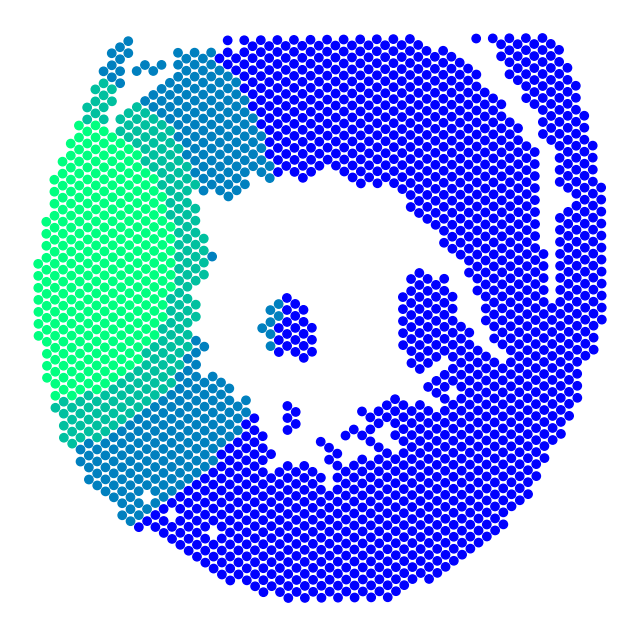

In [11]:
adata_sim_345 = sc.read('../../../../Data/King/Simulated_adatas/adata_Sham_1_center_345.h5ad')

plt.figure(figsize = (8, 8))
plt.axis('off')

# Function to truncate a colormap
def truncate_colormap(cmap, min_val=0.0, max_val=1.0, n=100):
    new_cmap = LinearSegmentedColormap.from_list(
        f"truncated({cmap.name},{min_val:.2f},{max_val:.2f})",
        cmap(np.linspace(min_val, max_val, n)),
    )
    return new_cmap

# Original magma colormap
original_cmap = plt.cm.winter

# Truncate the colormap to use only the middle 50% (0.25 to 0.75)
truncated_cmap = truncate_colormap(original_cmap, min_val=0, max_val=1)

plt.scatter(adata_sim_345.obsm['spatial'][:, 0], adata_sim_345.obsm['spatial'][:, 1], c=adata_sim_345.obs['is_remodeled'], cmap=truncated_cmap)
plt.savefig('./simulation_sham_1_345_sim_regions.png', format='png', dpi=600, bbox_inches='tight')

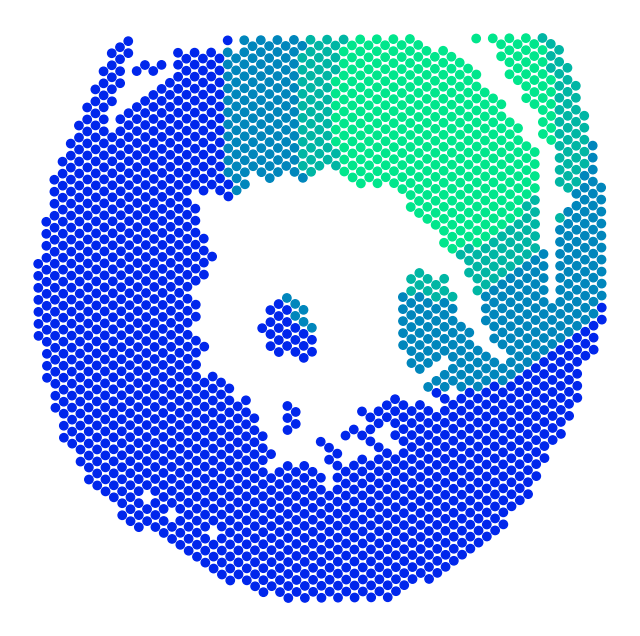

In [12]:
adata_sim_976 = sc.read('../../../../Data/King/Simulated_adatas/adata_Sham_1_center_976.h5ad')

plt.figure(figsize = (8, 8))
plt.axis('off')

# Function to truncate a colormap
def truncate_colormap(cmap, min_val=0.0, max_val=1.0, n=100):
    new_cmap = LinearSegmentedColormap.from_list(
        f"truncated({cmap.name},{min_val:.2f},{max_val:.2f})",
        cmap(np.linspace(min_val, max_val, n)),
    )
    return new_cmap

# Original magma colormap
original_cmap = plt.cm.winter

# Truncate the colormap to use only the middle 50% (0.25 to 0.75)
truncated_cmap = truncate_colormap(original_cmap, min_val=0.15, max_val=0.9)

plt.scatter(adata_sim_976.obsm['spatial'][:, 0], adata_sim_976.obsm['spatial'][:, 1], c=adata_sim_976.obs['is_remodeled'], cmap=truncated_cmap)
plt.savefig('./simulation_sham_1_976_sim_regions.png', format='png', dpi=600, bbox_inches='tight')

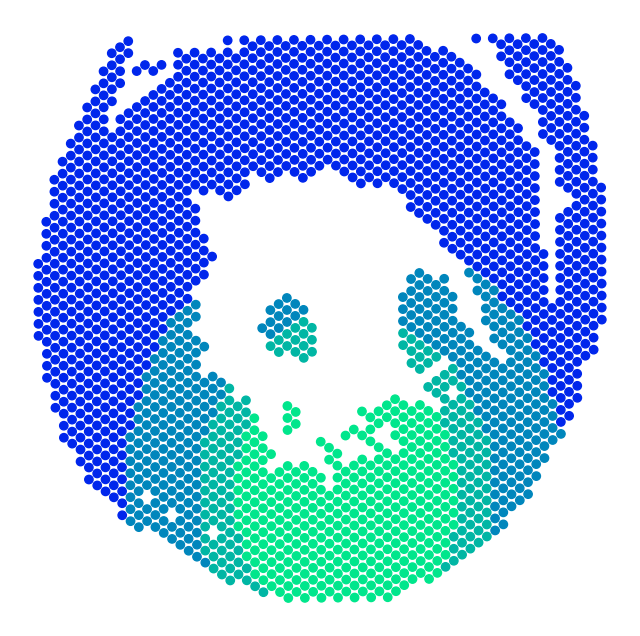

In [13]:
adata_sim_1024 = sc.read('../../../../Data/King/Simulated_adatas/adata_Sham_1_center_1024.h5ad')

plt.figure(figsize = (8, 8))
plt.axis('off')

# Function to truncate a colormap
def truncate_colormap(cmap, min_val=0.0, max_val=1.0, n=100):
    new_cmap = LinearSegmentedColormap.from_list(
        f"truncated({cmap.name},{min_val:.2f},{max_val:.2f})",
        cmap(np.linspace(min_val, max_val, n)),
    )
    return new_cmap

# Original magma colormap
original_cmap = plt.cm.winter

# Truncate the colormap to use only the middle 50% (0.25 to 0.75)
truncated_cmap = truncate_colormap(original_cmap, min_val=0.15, max_val=0.9)

plt.scatter(adata_sim_1024.obsm['spatial'][:, 0], adata_sim_1024.obsm['spatial'][:, 1], c=adata_sim_1024.obs['is_remodeled'], cmap=truncated_cmap)
plt.savefig('./simulation_sham_1_1024_sim_regions.png', format='png', dpi=600, bbox_inches='tight')

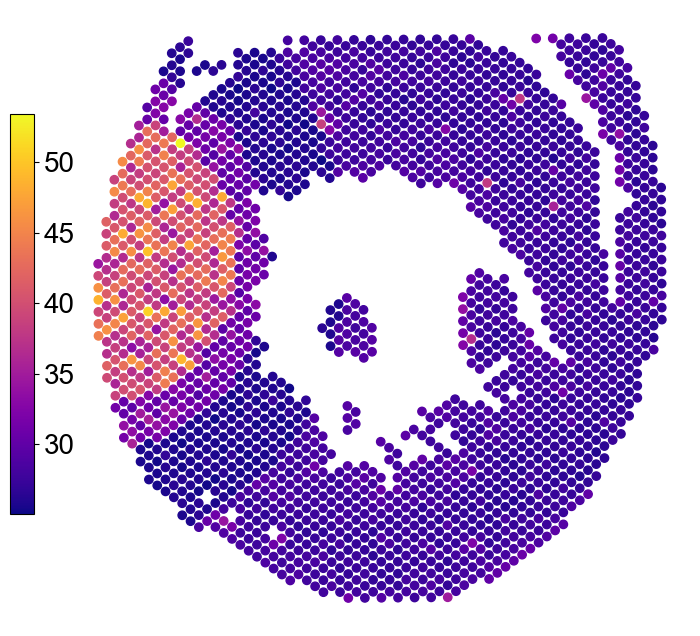

In [71]:
adata_sim_345 = sc.read('../../../../Data/King/Simulated_adatas/adata_Sham_1_center_345.h5ad')

df_pathological_score_sham_1_simu_345 = pd.read_csv('../../results/Simulation_v3_result/config_Simulation_v3_result_adata_Sham_1_vs_adata_Sham_1_center_345_js_sinkhorn_lambda_0.1_alpha_0.0001.json/pathological_scores.csv', index_col=0)

adata_sim_345.obs = adata_sim_345.obs.join(df_pathological_score_sham_1_simu_345)

# Create the figure with specified size
plt.figure(figsize=(8, 8))

# Turn off the axes
plt.axis('off')

# Create the scatter plot
scatter = plt.scatter(
    adata_sim_345.obsm['spatial'][:, 0], 
    adata_sim_345.obsm['spatial'][:, 1], 
    c=adata_sim_345.obs['pathological_score'], 
    cmap='plasma'
)

# Create an axis for the colorbar next to the plot, adjusting position
cbar_ax = plt.gcf().add_axes([0.05, 0.25, 0.03, 0.5])

# Add the colorbar to the figure
cbar = plt.colorbar(scatter, cax=cbar_ax)

# Increase font size of colorbar ticks
cbar.ax.tick_params(labelsize=20)  # Change '12' to your desired font size

plt.savefig('./simulation_sham_1_345.png', format='png', dpi=600, bbox_inches='tight')

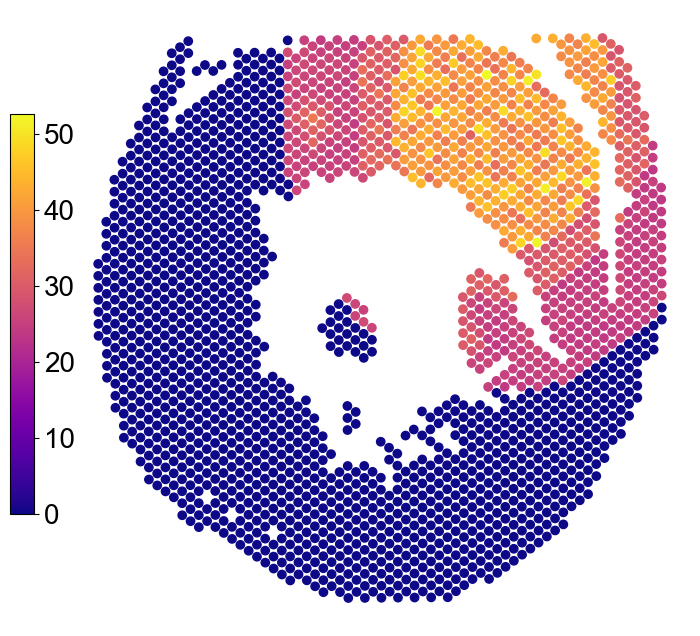

In [72]:
adata_sim_976 = sc.read('../../../../Data/King/Simulated_adatas/adata_Sham_1_center_976.h5ad')

df_pathological_score_sham_1_simu_976 = pd.read_csv('../../results/Simulation_v3_result/config_Simulation_v3_result_adata_Sham_1_vs_adata_Sham_1_center_976_js_sinkhorn_lambda_0.01_alpha_0.01.json/pathological_scores.csv', index_col=0)

adata_sim_976.obs = adata_sim_976.obs.join(df_pathological_score_sham_1_simu_976)

# Create the figure with specified size
plt.figure(figsize=(8, 8))

# Turn off the axes
plt.axis('off')

# Create the scatter plot
scatter = plt.scatter(
    adata_sim_976.obsm['spatial'][:, 0], 
    adata_sim_976.obsm['spatial'][:, 1], 
    c=adata_sim_976.obs['pathological_score'], 
    cmap='plasma'
)

# Create an axis for the colorbar next to the plot, adjusting position
cbar_ax = plt.gcf().add_axes([0.05, 0.25, 0.03, 0.5])

# Add the colorbar to the figure
cbar = plt.colorbar(scatter, cax=cbar_ax)

# Increase font size of colorbar ticks
cbar.ax.tick_params(labelsize=20)  # Change '12' to your desired font size

plt.savefig('./simulation_sham_1_976.png', format='png', dpi=600, bbox_inches='tight')

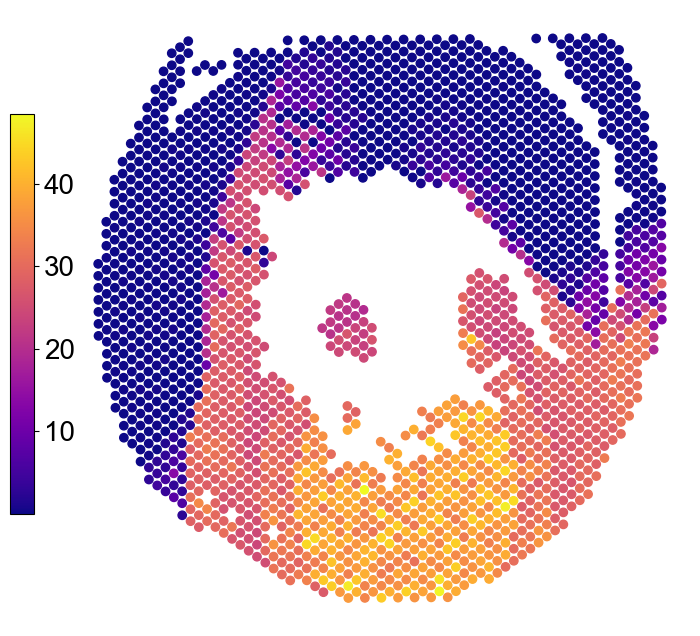

In [73]:
adata_sim_1024 = sc.read('../../../../Data/King/Simulated_adatas/adata_Sham_1_center_1024.h5ad')

df_pathological_score_sham_1_simu_1024 = pd.read_csv('../../results/Simulation_v3_result/config_Simulation_v3_result_adata_Sham_1_vs_adata_Sham_1_center_1024_js_sinkhorn_lambda_0.001_alpha_0.1.json/pathological_scores.csv', index_col=0)

adata_sim_1024.obs = adata_sim_1024.obs.join(df_pathological_score_sham_1_simu_1024)

# Create the figure with specified size
plt.figure(figsize=(8, 8))

# Turn off the axes
plt.axis('off')

# Create the scatter plot
scatter = plt.scatter(
    adata_sim_1024.obsm['spatial'][:, 0], 
    adata_sim_1024.obsm['spatial'][:, 1], 
    c=adata_sim_1024.obs['pathological_score'], 
    cmap='plasma'
)

# Create an axis for the colorbar next to the plot, adjusting position
cbar_ax = plt.gcf().add_axes([0.05, 0.25, 0.03, 0.5])

# Add the colorbar to the figure
cbar = plt.colorbar(scatter, cax=cbar_ax)

# Increase font size of colorbar ticks
cbar.ax.tick_params(labelsize=20)  # Change '12' to your desired font size

plt.savefig('./simulation_sham_1_1024.png', format='png', dpi=600, bbox_inches='tight')

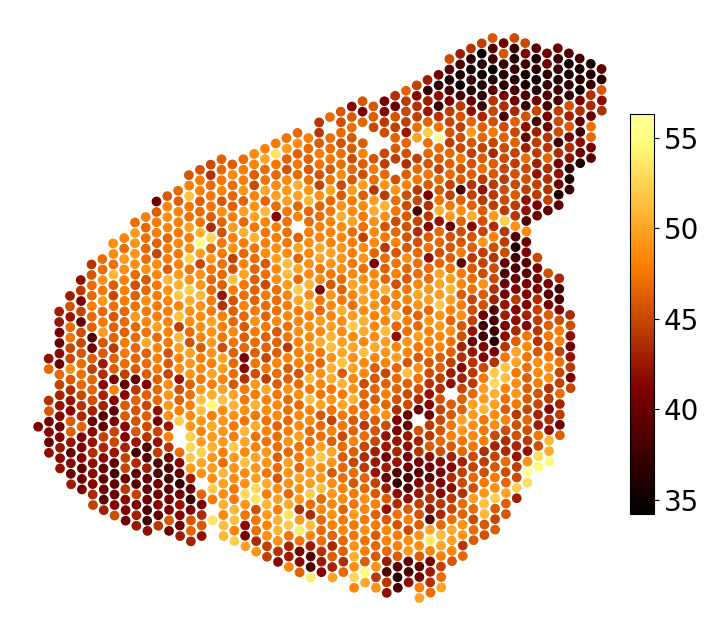

In [31]:
adata_mdx = sc.read('/home/nuwaisir/Corridor/SPaSE/Data/Mouse_DMD/Fixed_adatas/mdx_adata.h5ad')
mdx_scores = pd.read_csv('/home/nuwaisir/Corridor/SPaSE/Workspace/SPaSE/results/Mouse_DMD/config_Mouse_DMD_C57BL10_adata_vs_mdx_adata_js_sinkhorn_lambda_0.01_alpha_0.0001.json/pathological_scores.csv', index_col=0)

adata_mdx.obs = adata_mdx.obs.join(mdx_scores)

# Create the figure with specified size
plt.figure(figsize=(8, 8))

# Turn off the axes
plt.axis('off')

original_cmap = plt.cm.afmhot
truncated_cmap = truncate_colormap(original_cmap, min_val=0, max_val=0.8)

# Create the scatter plot
scatter = plt.scatter(
    adata_mdx.obsm['spatial'][:, 0], 
    -adata_mdx.obsm['spatial'][:, 1], 
    c=adata_mdx.obs['pathological_score'], 
    cmap=truncated_cmap
)

# Create an axis for the colorbar next to the plot, adjusting position
cbar_ax = plt.gcf().add_axes([0.9, 0.25, 0.03, 0.5])

# Add the colorbar to the figure
cbar = plt.colorbar(scatter, cax=cbar_ax)

# Increase font size of colorbar ticks
cbar.ax.tick_params(labelsize=20)  # Change '12' to your desired font size

plt.savefig('./adata_mdx.png', format='png', dpi=600, bbox_inches='tight')

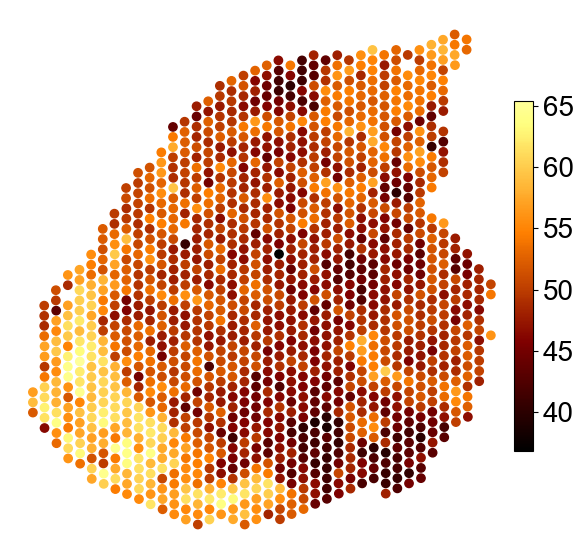

In [74]:
adata_D2mdx = sc.read('/home/nuwaisir/Corridor/SPaSE/Data/Mouse_DMD/Fixed_adatas/D2mdx_adata.h5ad')
D2mdx_scores = pd.read_csv('/home/nuwaisir/Corridor/SPaSE/Workspace/SPaSE/results/Mouse_DMD/config_Mouse_DMD_DBA2J_adata_vs_D2mdx_adata_js_sinkhorn_lambda_0.001_alpha_0.0001.json/pathological_scores.csv', index_col=0)

adata_D2mdx.obs = adata_D2mdx.obs.join(D2mdx_scores)

# Create the figure with specified size
plt.figure(figsize=(6.5, 7))

# Turn off the axes
plt.axis('off')

original_cmap = plt.cm.afmhot
truncated_cmap = truncate_colormap(original_cmap, min_val=0, max_val=0.8)

# Create the scatter plot
scatter = plt.scatter(
    adata_D2mdx.obsm['spatial'][:, 0], 
    -adata_D2mdx.obsm['spatial'][:, 1], 
    c=adata_D2mdx.obs['pathological_score'], 
    cmap=truncated_cmap
)

# Create an axis for the colorbar next to the plot, adjusting position
cbar_ax = plt.gcf().add_axes([0.9, 0.25, 0.03, 0.5])

# Add the colorbar to the figure
cbar = plt.colorbar(scatter, cax=cbar_ax)

# Increase font size of colorbar ticks
cbar.ax.tick_params(labelsize=20)  # Change '12' to your desired font size

plt.savefig('./adata_D2mdx.png', format='png', dpi=600, bbox_inches='tight')

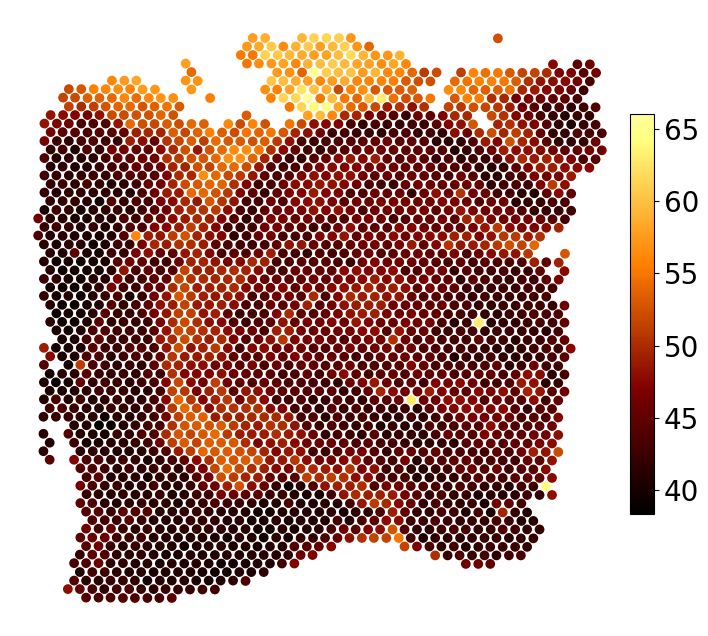

In [34]:
adata_mouse_brain = sc.read('/home/nuwaisir/Corridor/SPaSE/Data/Mouse_brain/h5ad/adata_mouse_brain_D3.h5ad')
mouse_brain_scores = pd.read_csv('/home/nuwaisir/Corridor/SPaSE/Workspace/SPaSE/results/Mouse_brain/config_Mouse_brain_adata_mouse_brain_ctrl_vs_adata_mouse_brain_D3_js_sinkhorn_lambda_0.1_alpha_0.0001.json/pathological_scores.csv', index_col=0)
adata_mouse_brain.obs = adata_mouse_brain.obs.join(mouse_brain_scores)

# Create the figure with specified size
plt.figure(figsize=(8, 8))

# Turn off the axes
plt.axis('off')

original_cmap = plt.cm.afmhot
truncated_cmap = truncate_colormap(original_cmap, min_val=0, max_val=0.8)

# Create the scatter plot
scatter = plt.scatter(
    adata_mouse_brain.obsm['spatial'][:, 0], 
    -adata_mouse_brain.obsm['spatial'][:, 1], 
    c=adata_mouse_brain.obs['pathological_score'], 
    cmap=truncated_cmap
)

# Create an axis for the colorbar next to the plot, adjusting position
cbar_ax = plt.gcf().add_axes([0.9, 0.25, 0.03, 0.5])

# Add the colorbar to the figure
cbar = plt.colorbar(scatter, cax=cbar_ax)

# Increase font size of colorbar ticks
cbar.ax.tick_params(labelsize=20)  # Change '12' to your desired font size

plt.savefig('./adata_mouse_brain.png', format='png', dpi=600, bbox_inches='tight')

In [2]:
adata_mouse_brain = sc.read('/home/nuwaisir/Corridor/SPaSE/Data/Mouse_brain/h5ad/adata_stlearn_clustered.h5ad')

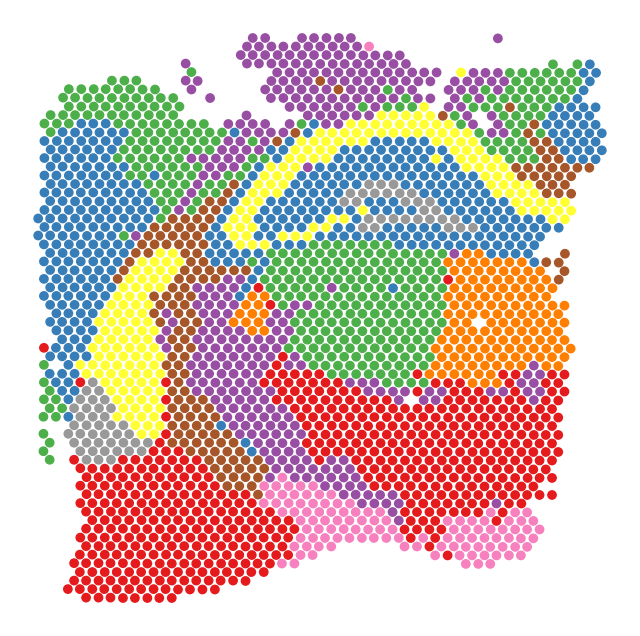

In [4]:
plt.figure(figsize=(8, 8))
plt.axis('off')
plt.scatter(adata_mouse_brain.obsm['spatial'][:, 0], -adata_mouse_brain.obsm['spatial'][:, 1], c=list(map(int, adata_mouse_brain.obs['louvain'].values)), cmap='Set1')
plt.savefig('mouse_brain_clustered.png', format='png', dpi=600, bbox_inches='tight')

ValueError: invalid literal for int() with base 10: 'c'